In [ ]:
### Importa as bibilotecas
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Carrega a base de dados
wine = pd.read_csv("wine.csv", header=None)

In [ ]:
#Mostra um resumo dos dados
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
wine[13].unique()

array([1, 2, 3])

In [ ]:
wine.shape

(178, 14)

In [ ]:
# Carrega biblioteca para transformar valores string em tipo númerico
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(wine[13])
print(encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
# Recebe os novos dados que foram transformados em número
wine[13]=encoded

In [ ]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
wine[13].unique()

array([0, 1, 2])

Lista com o que cada coluna signfica:
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline

In [ ]:
# X recebe os valores dos atributos
x = wine.iloc[:,:-1]

# Y recebe os valores da classe
y = wine.iloc[:,13]


In [ ]:
# Começa exercício de validação cruzada
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Insere o seed, para fazer com que os modelos mantenham a mesma aleatoriedade
seed= 7

# Inserindo os modelos
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))


In [ ]:
# Insere vetor para tratar cada modelo como um caso
results = []
names= []

#Acurácia
acc = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle= True, random_state=seed)
    cv_results = model_selection.cross_val_score(model,x, y, cv=kfold, scoring=acc)
    results.append(cv_results.mean())
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.701746 (0.076884)
CART: 0.920952 (0.045610)
NB: 0.751746 (0.132517)


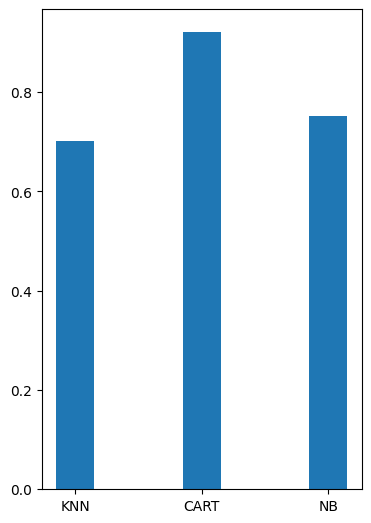

In [ ]:
# Plota gráfico pra visualizar as diferenças

fig = plt.figure()
ax = fig.add_axes([0, 0,0.5, 1])
ax.bar(names, results, width=0.3)
plt.show()